In [20]:
def model(X,W,b):
    X=np.array(X)
    return np.sum(X*W)+b

In [21]:
import itertools
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [24]:
num_train=900
num_test=100
data=make_regression(n_samples=num_train,n_features=2)

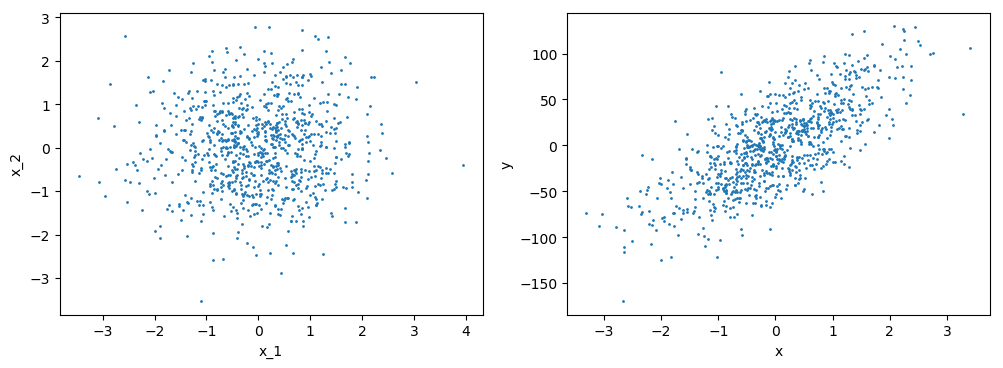

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=[12, 4], dpi=100)
plt.subplot(1, 2, 1)
plt.scatter(data[0][:, 0], data[0][:, 1], 1)
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.subplot(1, 2, 2)
x = PCA(n_components=1).fit_transform(data[0])
plt.scatter(x, data[1], 1)
plt.xlabel('x')
plt.ylabel('y')
train_x, test_x, train_y, test_y = [itertools.cycle(i) for i in train_test_split(data[0], data[1], test_size=num_test)]

In [26]:
from sklearn.metrics import mean_squared_error as mse

In [27]:
train_steps=2000
lr=0.01
summary_step=20
summary=[]

In [28]:
import numpy as np
W=np.random.randn(2)
b=0
for i in range(train_steps):
    if i%summary_step==0:
        tmp=[]
        for j in range(num_test):
            X=next(test_x)
            label=next(test_y)
            out=model(X,W,b)
            tmp.append(np.array([label,out]))
        tmp=np.array(tmp)
        loss=mse(tmp[:,0],tmp[:,1])
        summary.append(np.array([i+1,loss]))
    X = next(train_x)
    label = next(train_y)
    out = model(X, W, b)
    dW = -X * (label - out)
    W = W - lr * dW
    db = -1 * (label - out)
    b = b - lr * db

Text(0,0.5,'losses')

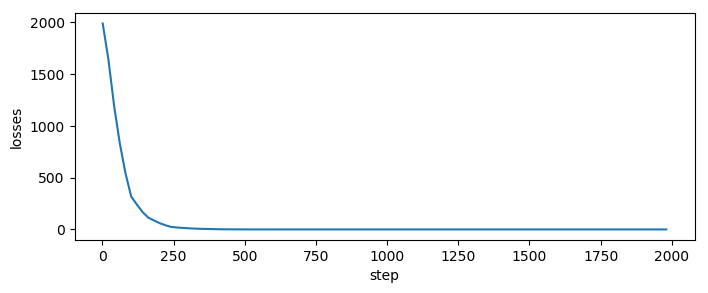

In [29]:
summary = np.array(summary)    
plt.figure(figsize=[8, 3], dpi=100)
plt.plot(summary[:, 0], summary[:, 1])
plt.xlabel('step')
plt.ylabel('losses')

作业
判断题

[√] LMS算法中的神经元与Rosenblatt感知器的区别是前者激活函数为线性激活函数，后者为阶跃函数。
[ ] LMS算法使用批量梯度下降法优化代价函数并求解模型参数。
[√] 最速下降法中的学习率通常是大约0小于1的值。
[√] 小批量学习中学习率应该设置小一些（相比于批量学习）以保证稳定性。
[ ] 在线算法是指从连续产生样本的数据流中抽取样本，在训练时取小批量样本进行。（训练时取的一个）
[ ] 梯度下降法和牛顿法都是一阶优化法。（牛顿是二阶）
[√] 使用梯度下降法等优化算法求解模型参数时，往往首先需要打乱原始样本数据的顺序。
[√] 通常的，小批量算法比批量算法运算迭代一次所需的计算机资源更少。
选择题

关于最小均方算法的说法正确的是（ ABCD ）

A. 模型由一个神经元构成。

B. 使用优化法可得到模型参数。

C. 模型参数的初始值是随机的。

D. 最小均方算法在更新参数时学习率过大可能导致模型无法收敛。

简答题

以下任务分别使用了哪种优化法（批量、小批量、随机/在线优化法）
[小批量] 从手写数字数据集MNIST中每次随机抽取32个样本完成一次训练。
[在线] 根据用户对购物网站访问实时生成的数据，训练用户对物品偏好的算法。
[批量] 从搜集到的100个样本的房价数据集中训练模型估计房价，优化时每次取100个样本。